PROGRAM K-MEAN DATA SET 'XCLARA'
Masukkan Banyak Cluster : 8
Centroid Acak Awal:
     V1    V2
0  64.0  56.0
1  23.0  23.0
2  53.0  58.0
3  11.0  45.0
4  63.0  27.0
5  11.0   2.0
6  25.0  18.0
7  76.0  11.0

Centroid Akhir :
          V1         V2
0  45.410847  50.288704
1  10.124878  20.867353
2  46.772568  67.628418
3  29.874170  60.863686
4  67.531830  -2.313192
5   0.112323   5.462322
6  19.249470   4.856803
7  72.676704 -18.120237

Kelompok  0
           V1        V2
0    37.48364  34.12808
1    39.89024  23.99687
2    48.19050  56.00667
3    55.55334  57.31956
4    45.11086  46.34557
5    55.90229  44.41355
6    39.22292  42.76795
7    46.66542  58.45405
8    57.76221  50.79996
9    53.64062  53.19439
10   68.81378  49.40914
11   38.22668  55.08212
12   44.42384  52.04990
13   43.85302  49.00594
14   52.93561  51.52707
15   44.43309  58.96450
16   54.93488  52.03030
17   38.54234  53.11563
18   39.83815  48.70388
19   54.45572  49.34488
20   47.31255  47.80124
21   32.63545  43.

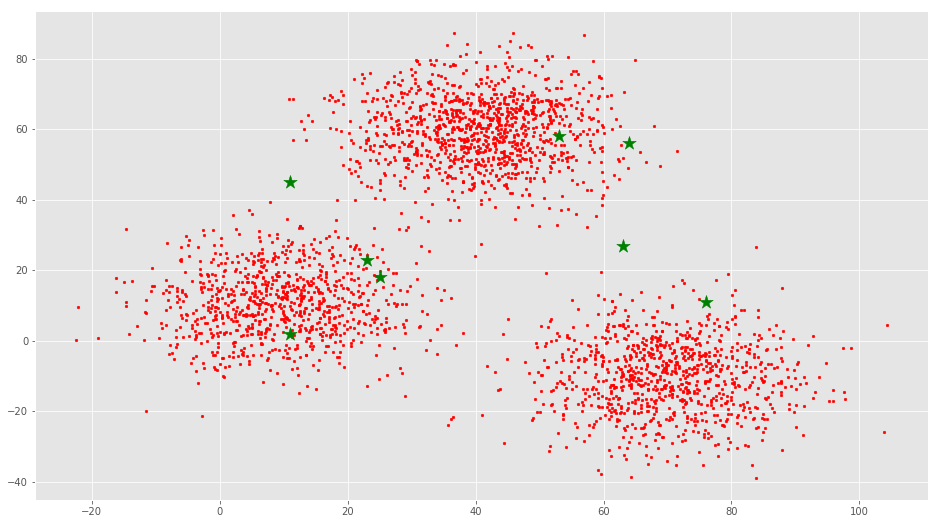

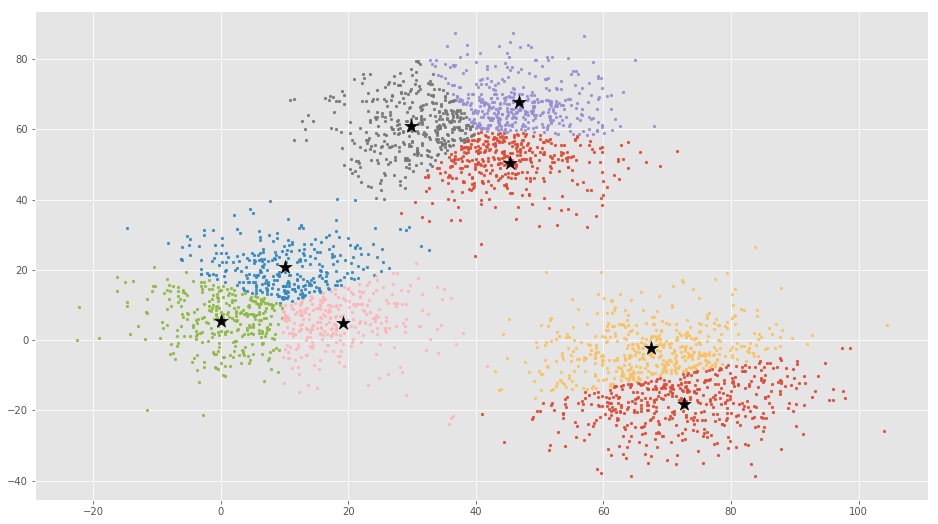

In [4]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

print ("PROGRAM K-MEAN DATA SET 'XCLARA'")
# import Data
data = pd.read_csv('xclara.csv')

# Mendapatkan data
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))

# Kalkulator Jarak Euclidean
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Banyak Cluster
k = int(input("Masukkan Banyak Cluster : "))

# X koordinat centroid acak
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y koordinat centroid acak
C_y = np.random.randint(0, np.max(X)-20, size=k)

# menggabungkan nilai koordinat centroid X dan Y
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
ca = pd.DataFrame(C)
ca.columns=["V1","V2"]
print("Centroid Acak Awal:")
print(ca)
print()

# Plotting Centroid dan data
plt.scatter(f1, f2, c='r', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# Untuk menyimpan nilai centroid saat diperbarui
C_old = np.zeros(C.shape)

# Label Cluster (0, 1, 2)
clusters = np.zeros(len(X))

# Jarak antara centroid baru dan centroid lama
error = dist(C, C_old, None)
per = 1
# Loop akan berjalan sampai kesalahan menjadi nol
while (error != 0) or (per):
    # Menetapkan setiap nilai ke kluster terdekat
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Menyimpan nilai centroid lama
    C_old = deepcopy(C)
    
    # Menemukan centroid baru dengan mengambil nilai rata-rata
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
    #menampilkan Centroid awal - akhir
    ce = pd.DataFrame(C_old)
    ce.columns=["V1","V2"]
    #print ("Centroid ke-",per)
    #print (ce)
    if error == 0:
        break
    else:per += 1
        
# Menampilkan centroid Akhir
print ("Centroid Akhir :")
print (ca)
    
#menampilkan data menurut kelompoknya   
for i in range(k):
        print ('')
        print ("Kelompok ",i)
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        p = pd.DataFrame(points)
        p.columns=["V1","V2"]
        print (p)
        
#menampilkan visualisasi
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7)
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')